In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import bpl
import wcpredictor

## Neutral Model, Results Since 2018 + FIFA Rankings

In [5]:
# results = wcpredictor.get_results_data(start_date="2018-01-01",
#                                        end_date="2022-11-01")
# fifa_rankings = wcpredictor.get_fifa_rankings_data()
wc_teams = wcpredictor.get_teams_data(year="2022")

# print(f"{sum(results['neutral'])} / {len(results)} games are neutral")

# wc_pred = wcpredictor.WCPred(results = results, ratings=fifa_rankings)

In [6]:
wc_pred = wcpredictor.get_and_train_model(rankings_source="game")
dict(zip(sorted(list(set(wcpredictor.get_confederations_data()["Confederation"]))),
         wc_pred.model.confederation_strength.mean(axis=0).tolist()))

in get_and_train_model
Using FIFA organisation rankings
Using 3728 rows in training data
Using FIFA videogame rankings
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████████████████████████████| 1500/1500 [01:53<00:00, 13.24it/s, 255 steps of size 1.27e-02. acc. prob=0.94]


{'AFC': -0.11602337658405304,
 'CAF': 0.23087158799171448,
 'CONCACAF': -0.25115206837654114,
 'CONMEBOL': 0.7010869979858398,
 'OFC': -0.9382199645042419,
 'UEFA': 0.3628579080104828}

In [7]:
wc_teams_idx = {team: idx for idx, team in enumerate(wc_pred.model.teams)
                if team in wc_teams["Team"].values}

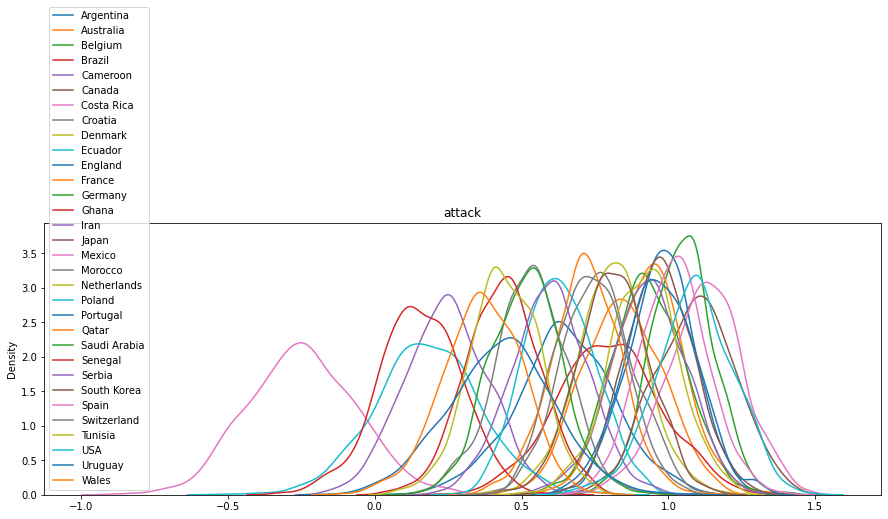

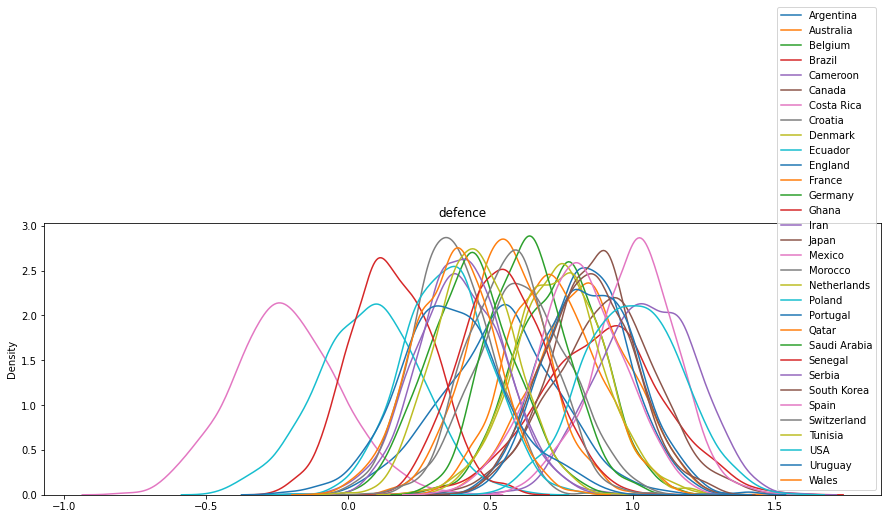

In [8]:
ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.attack[:, idx], label=team)
plt.title('attack')
plt.legend()

ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.defence[:, idx], label=team)
plt.title('defence')
plt.legend()

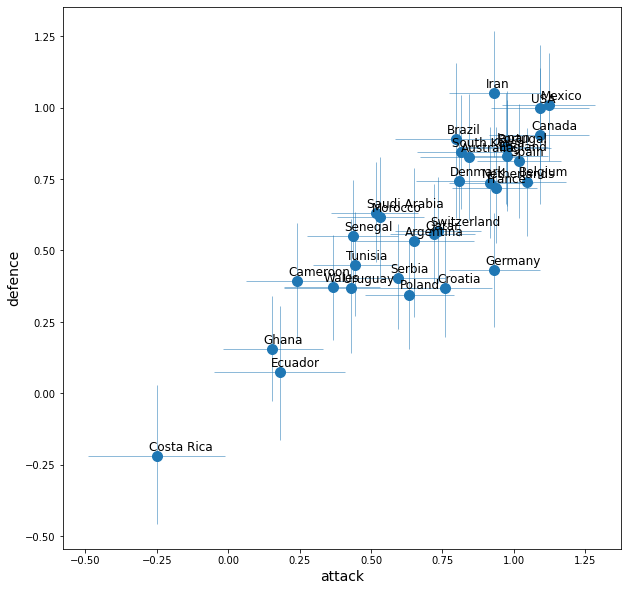

In [9]:
a_mean = wc_pred.model.attack.mean(axis=0)
b_mean = wc_pred.model.defence.mean(axis=0)

a_conf95 = np.abs(np.quantile(wc_pred.model.attack,[0.025, 0.975], axis=0) - a_mean)
b_conf95 = np.abs(np.quantile(wc_pred.model.defence, [0.025, 0.975], axis=0) - b_mean)
a_conf80 = np.abs(np.quantile(wc_pred.model.attack,[0.1, 0.9], axis=0) - a_mean)
b_conf80 = np.abs(np.quantile(wc_pred.model.defence, [0.1, 0.9], axis=0) - b_mean)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_aspect('equal')
select_idx = np.array(list(wc_teams_idx.values()), dtype=int)
plt.errorbar(a_mean[select_idx],
             b_mean[select_idx],
             xerr=a_conf80[:, select_idx],
             yerr=b_conf80[:, select_idx],
             marker='o', markersize=10,
             linestyle='', linewidth=0.5)
plt.xlabel('attack', fontsize=14)
plt.ylabel('defence', fontsize=14)

for team, idx in wc_teams_idx.items():
    ax.annotate(team,
                (a_mean[idx]-0.03, b_mean[idx]+0.02), 
                fontsize=12)

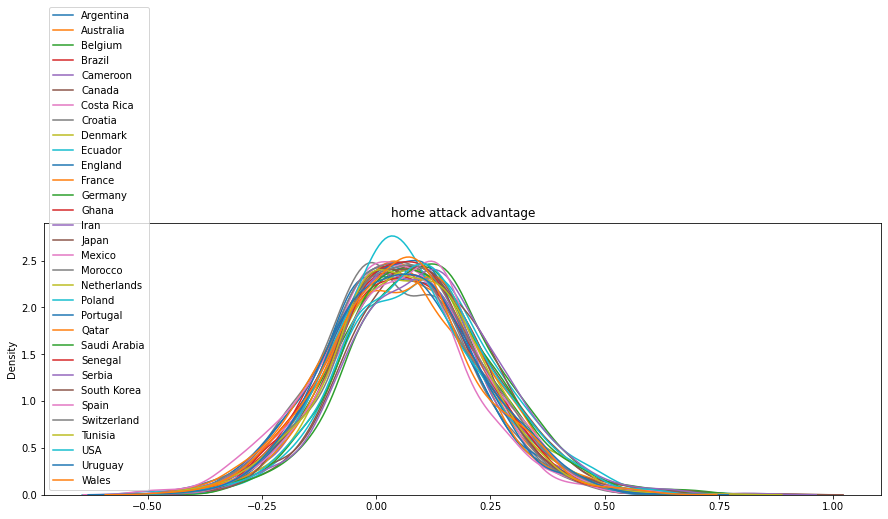

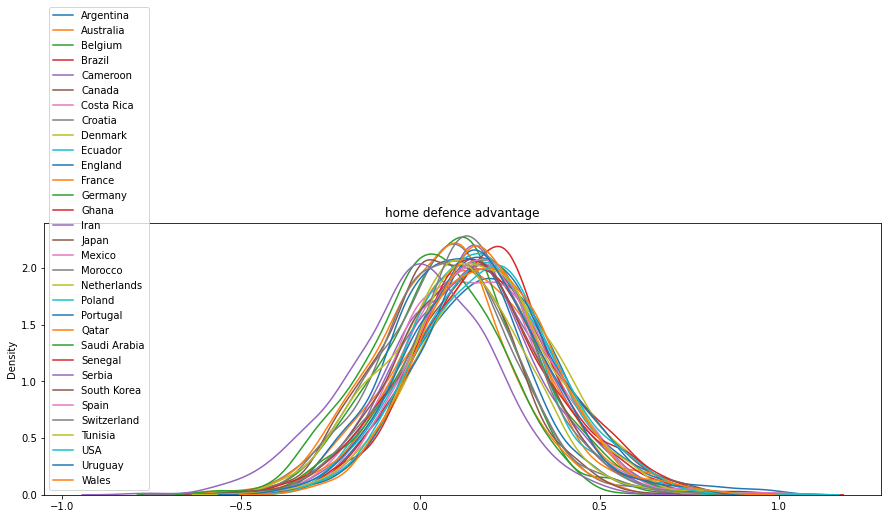

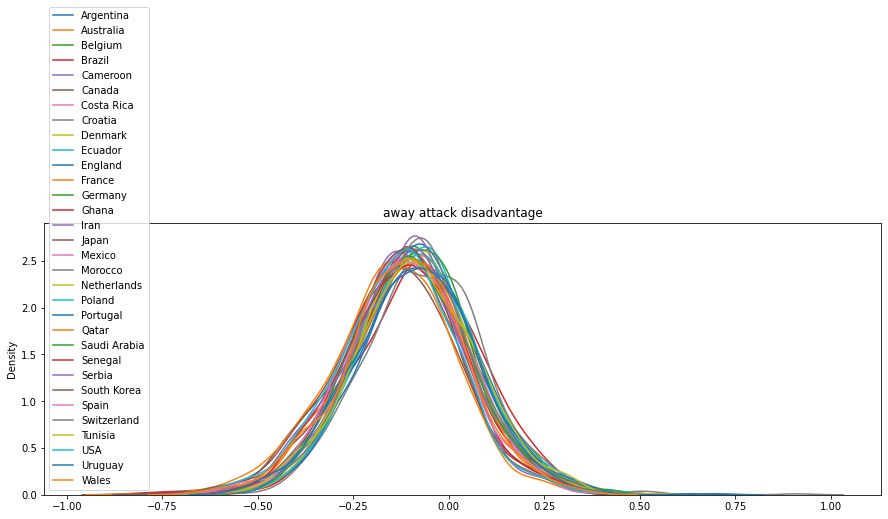

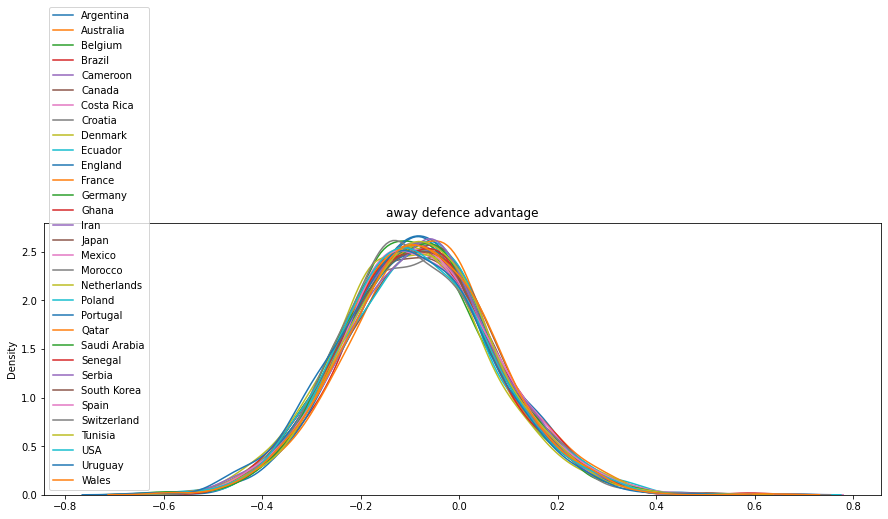

In [10]:
ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.home_attack[:, idx], label=team)
plt.title('home attack advantage')
plt.legend()

ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.home_defence[:, idx], label=team)
plt.title('home defence advantage')
plt.legend()

ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.away_attack[:, idx], label=team)
plt.title('away attack disadvantage')
plt.legend()

ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.away_defence[:, idx], label=team)
plt.title('away defence advantage')
plt.legend()

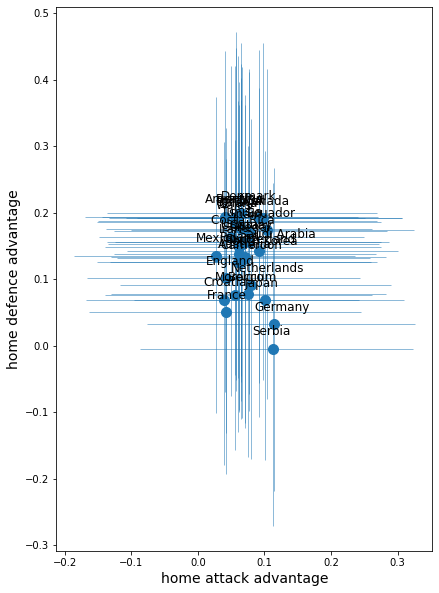

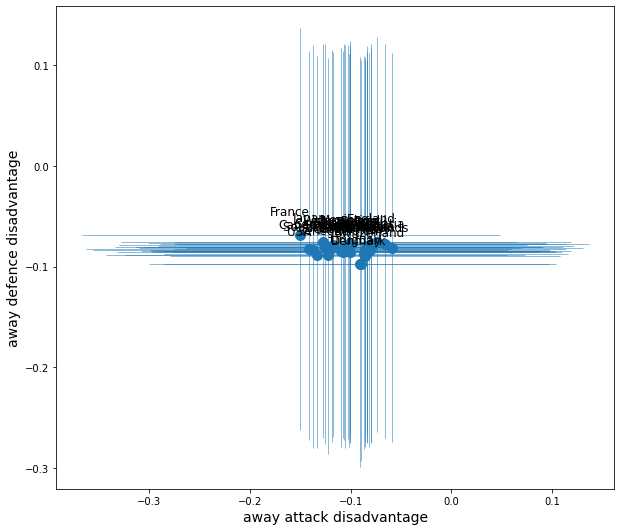

In [11]:
a_mean = wc_pred.model.home_attack.mean(axis=0)
b_mean = wc_pred.model.home_defence.mean(axis=0)

a_conf95 = np.abs(np.quantile(wc_pred.model.home_attack,[0.025, 0.975], axis=0) - a_mean)
b_conf95 = np.abs(np.quantile(wc_pred.model.home_defence, [0.025, 0.975], axis=0) - b_mean)
a_conf80 = np.abs(np.quantile(wc_pred.model.home_attack,[0.1, 0.9], axis=0) - a_mean)
b_conf80 = np.abs(np.quantile(wc_pred.model.home_defence, [0.1, 0.9], axis=0) - b_mean)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_aspect('equal')
select_idx = np.array(list(wc_teams_idx.values()), dtype=int)
plt.errorbar(a_mean[select_idx],
             b_mean[select_idx],
             xerr=a_conf80[:, select_idx],
             yerr=b_conf80[:, select_idx],
             marker='o', markersize=10,
             linestyle='', linewidth=0.5)
plt.xlabel('home attack advantage', fontsize=14)
plt.ylabel('home defence advantage', fontsize=14)

for team, idx in wc_teams_idx.items():
    ax.annotate(team,
                (a_mean[idx]-0.03, b_mean[idx]+0.02), 
                fontsize=12)

    
    
a_mean = wc_pred.model.away_attack.mean(axis=0)
b_mean = wc_pred.model.away_defence.mean(axis=0)

a_conf95 = np.abs(np.quantile(wc_pred.model.away_attack,[0.025, 0.975], axis=0) - a_mean)
b_conf95 = np.abs(np.quantile(wc_pred.model.away_defence, [0.025, 0.975], axis=0) - b_mean)
a_conf80 = np.abs(np.quantile(wc_pred.model.away_attack,[0.1, 0.9], axis=0) - a_mean)
b_conf80 = np.abs(np.quantile(wc_pred.model.away_defence, [0.1, 0.9], axis=0) - b_mean)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_aspect('equal')
select_idx = np.array(list(wc_teams_idx.values()), dtype=int)
plt.errorbar(a_mean[select_idx],
             b_mean[select_idx],
             xerr=a_conf80[:, select_idx],
             yerr=b_conf80[:, select_idx],
             marker='o', markersize=10,
             linestyle='', linewidth=0.5)
plt.xlabel('away attack disadvantage', fontsize=14)
plt.ylabel('away defence disadvantage', fontsize=14)

for team, idx in wc_teams_idx.items():
    ax.annotate(team,
                (a_mean[idx]-0.03, b_mean[idx]+0.02), 
                fontsize=12)


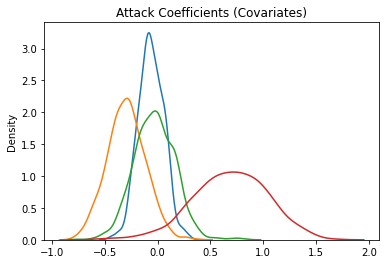

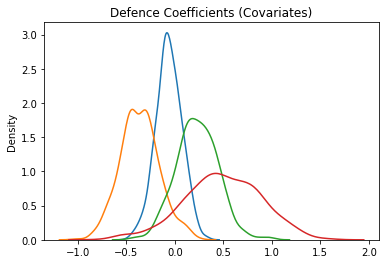

In [12]:
if wc_pred.model.attack_coefficients is not None:
    plt.figure()
    for i in range(wc_pred.model.attack_coefficients.shape[1]):
        sns.kdeplot(wc_pred.model.attack_coefficients[:, i])
    plt.title("Attack Coefficients (Covariates)")

    plt.figure()
    for i in range(wc_pred.model.defence_coefficients.shape[1]):
        sns.kdeplot(wc_pred.model.defence_coefficients[:, i])
    plt.title("Defence Coefficients (Covariates)")

## Using organisation rankings

In [13]:
wc_pred = wcpredictor.get_and_train_model(rankings_source="org")
dict(zip(sorted(list(set(wcpredictor.get_confederations_data()["Confederation"]))),
         wc_pred.model.confederation_strength.mean(axis=0).tolist()))

in get_and_train_model
Using FIFA organisation rankings
Using 3728 rows in training data
Using FIFA organisation rankings
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████| 1500/1500 [00:40<00:00, 37.18it/s, 63 steps of size 7.57e-02. acc. prob=0.87]


{'AFC': 0.039518434554338455,
 'CAF': 0.16066396236419678,
 'CONCACAF': -0.0013177457731217146,
 'CONMEBOL': 0.1855531930923462,
 'OFC': -0.14644944667816162,
 'UEFA': 0.20105059444904327}

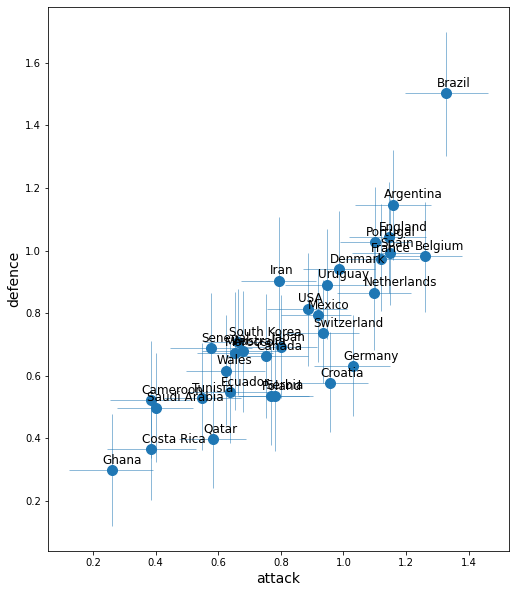

In [14]:
wc_teams_idx = {team: idx for idx, team in enumerate(wc_pred.model.teams)
                if team in wc_teams["Team"].values}
a_mean = wc_pred.model.attack.mean(axis=0)
b_mean = wc_pred.model.defence.mean(axis=0)

a_conf95 = np.abs(np.quantile(wc_pred.model.attack,[0.025, 0.975], axis=0) - a_mean)
b_conf95 = np.abs(np.quantile(wc_pred.model.defence, [0.025, 0.975], axis=0) - b_mean)
a_conf80 = np.abs(np.quantile(wc_pred.model.attack,[0.1, 0.9], axis=0) - a_mean)
b_conf80 = np.abs(np.quantile(wc_pred.model.defence, [0.1, 0.9], axis=0) - b_mean)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_aspect('equal')
select_idx = np.array(list(wc_teams_idx.values()), dtype=int)
plt.errorbar(a_mean[select_idx],
             b_mean[select_idx],
             xerr=a_conf80[:, select_idx],
             yerr=b_conf80[:, select_idx],
             marker='o', markersize=10,
             linestyle='', linewidth=0.5)
plt.xlabel('attack', fontsize=14)
plt.ylabel('defence', fontsize=14)

for team, idx in wc_teams_idx.items():
    ax.annotate(team,
                (a_mean[idx]-0.03, b_mean[idx]+0.02), 
                fontsize=12)

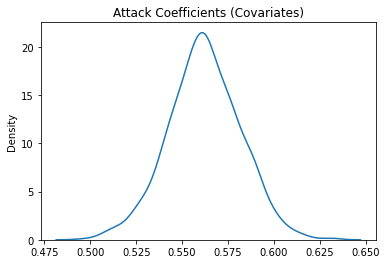

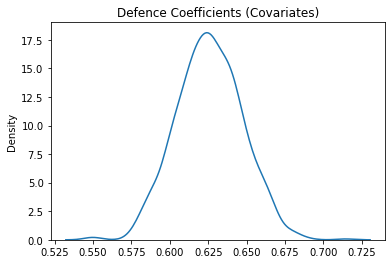

In [15]:
if wc_pred.model.attack_coefficients is not None:
    plt.figure()
    for i in range(wc_pred.model.attack_coefficients.shape[1]):
        sns.kdeplot(wc_pred.model.attack_coefficients[:, i])
    plt.title("Attack Coefficients (Covariates)")

    plt.figure()
    for i in range(wc_pred.model.defence_coefficients.shape[1]):
        sns.kdeplot(wc_pred.model.defence_coefficients[:, i])
    plt.title("Defence Coefficients (Covariates)")

## Use both Fifa organisation and Fifa game ratings

In [16]:
wc_pred = wcpredictor.get_and_train_model(rankings_source="both")
dict(zip(sorted(list(set(wcpredictor.get_confederations_data()["Confederation"]))),
         wc_pred.model.confederation_strength.mean(axis=0).tolist()))

in get_and_train_model
Using FIFA organisation rankings
Using 3728 rows in training data
Using FIFA videogame rankings
Using FIFA organisation rankings
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████████████████████████████| 1500/1500 [01:09<00:00, 21.63it/s, 127 steps of size 2.65e-02. acc. prob=0.93]


{'AFC': 0.009988472796976566,
 'CAF': 0.12416946887969971,
 'CONCACAF': -0.0314924381673336,
 'CONMEBOL': 0.1462242305278778,
 'OFC': -0.19247722625732422,
 'UEFA': 0.19412052631378174}

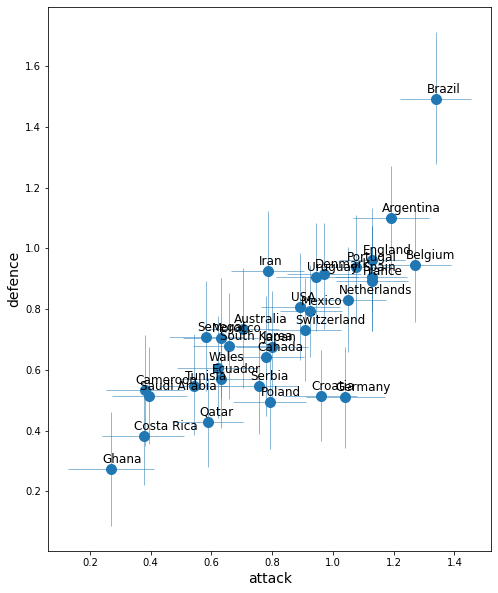

In [17]:
wc_teams_idx = {team: idx for idx, team in enumerate(wc_pred.model.teams)
                if team in wc_teams["Team"].values}
a_mean = wc_pred.model.attack.mean(axis=0)
b_mean = wc_pred.model.defence.mean(axis=0)

a_conf95 = np.abs(np.quantile(wc_pred.model.attack,[0.025, 0.975], axis=0) - a_mean)
b_conf95 = np.abs(np.quantile(wc_pred.model.defence, [0.025, 0.975], axis=0) - b_mean)
a_conf80 = np.abs(np.quantile(wc_pred.model.attack,[0.1, 0.9], axis=0) - a_mean)
b_conf80 = np.abs(np.quantile(wc_pred.model.defence, [0.1, 0.9], axis=0) - b_mean)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_aspect('equal')
select_idx = np.array(list(wc_teams_idx.values()), dtype=int)
plt.errorbar(a_mean[select_idx],
             b_mean[select_idx],
             xerr=a_conf80[:, select_idx],
             yerr=b_conf80[:, select_idx],
             marker='o', markersize=10,
             linestyle='', linewidth=0.5)
plt.xlabel('attack', fontsize=14)
plt.ylabel('defence', fontsize=14)

for team, idx in wc_teams_idx.items():
    ax.annotate(team,
                (a_mean[idx]-0.03, b_mean[idx]+0.02), 
                fontsize=12)

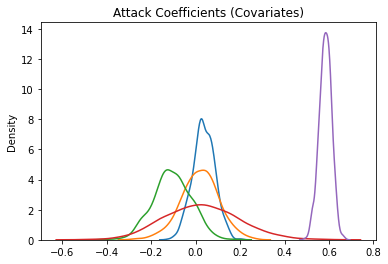

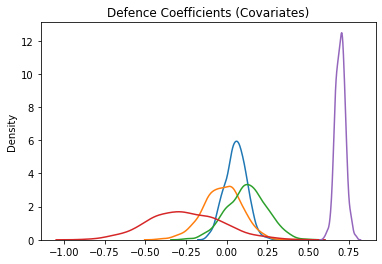

In [18]:
if wc_pred.model.attack_coefficients is not None:
    plt.figure()
    for i in range(wc_pred.model.attack_coefficients.shape[1]):
        sns.kdeplot(wc_pred.model.attack_coefficients[:, i])
    plt.title("Attack Coefficients (Covariates)")

    plt.figure()
    for i in range(wc_pred.model.defence_coefficients.shape[1]):
        sns.kdeplot(wc_pred.model.defence_coefficients[:, i])
    plt.title("Defence Coefficients (Covariates)")

## Dynamic Model

In [11]:
def add_gameweek_index(df):
    earliest_date = df["date"].min()
    latest_date = df["date"].max()
    month, year = earliest_date.month, earliest_date.year
    end_month, end_year = latest_date.month, latest_date.year
    gameweek_index = 1
    while pd.Timestamp(f"{year}-{month}-01") <= latest_date:
        month_cond = df["date"].dt.month == month
        year_cond = df["date"].dt.year == year
        df.loc[month_cond & year_cond, "gameweek"] = gameweek_index
        if month < 12:
            month += 1
        else:
            month = 1
            year += 1
        gameweek_index += 1
    df["gameweek"] = df["gameweek"].astype(int)
    return df

results = add_gameweek_index(results)

In [12]:
wc_pred = wcpredictor.WCPred(results = results, ratings=fifa_rankings)

In [13]:
wc_pred.fit_model(dynamic=True)

[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample:  82%|█████████████████████████████████████▉        | 1237/1500 [33:36<07:08,  1.63s/it, 1023 steps of size 5.45e-04. acc. prob=0.83]


KeyboardInterrupt: 

In [ ]:
wc_teams_idx = {team: idx for idx, team in enumerate(wc_pred.model.teams)
                if team in wc_teams["Team"].values}

In [ ]:
wc_pred.model.attack[51]

In [ ]:
ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.attack[56][:, idx], label=team)
plt.title('attack')
plt.legend()

ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.defence[56][:, idx], label=team)
plt.title('defence')
plt.legend()

In [ ]:
a_mean = wc_pred.model.attack[56].mean(axis=0)
b_mean = wc_pred.model.defence[56].mean(axis=0)

a_conf95 = np.abs(np.quantile(wc_pred.model.attack[56],[0.025, 0.975], axis=0) - a_mean)
b_conf95 = np.abs(np.quantile(wc_pred.model.defence[56], [0.025, 0.975], axis=0) - b_mean)
a_conf80 = np.abs(np.quantile(wc_pred.model.attack[56],[0.1, 0.9], axis=0) - a_mean)
b_conf80 = np.abs(np.quantile(wc_pred.model.defence[56], [0.1, 0.9], axis=0) - b_mean)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_aspect('equal')
select_idx = np.array(list(wc_teams_idx.values()), dtype=int)
plt.errorbar(a_mean[select_idx],
             b_mean[select_idx],
             xerr=a_conf80[:, select_idx],
             yerr=b_conf80[:, select_idx],
             marker='o', markersize=10,
             linestyle='', linewidth=0.5)
plt.xlabel('attack', fontsize=14)
plt.ylabel('defence', fontsize=14)

for team, idx in wc_teams_idx.items():
    ax.annotate(team,
                (a_mean[idx]-0.03, b_mean[idx]+0.02), 
                fontsize=12)

## Try Including More Years (but without FIFA rankings)

- fit up to end of 2020
- test on 2021 and 2022

In [45]:
results = pd.read_csv('../data/results.csv', parse_dates=['date'])
results.rename(columns={"neutral": "neutral_venue"}, inplace=True)


def filter_results(year_from, year_until, teams=None):
    r = results[(results.date.dt.year >= year_from) & (results.date.dt.year <= year_until)]
    if teams:
        r = r[(r["home_team"].isin(teams)) & (r["away_team"].isin(teams))]
    return r

def fit_model_between(year_from, year_until):
    r = filter_results(year_from, year_until)
    wc_pred = WCPred(results = r)
    wc_pred.fit_model()
    return wc_pred.model


def test_model_between(model, year_from, year_until):
    r = filter_results(year_from, year_until, model.teams)
    proba = model.predict_score_proba(
        np.array(r["home_team"]),
        np.array(r["away_team"]),
        np.array(r["home_score"]),
        np.array(r["away_score"]),
        np.array(r["neutral_venue"]),
    )
    return np.log(proba).sum() / len(proba)  # log likelihood


1872
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [03:46<00:00,  6.62it/s, 63 steps of size 8.28e-02. acc. prob=0.88]


1900
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [03:53<00:00,  6.42it/s, 63 steps of size 9.18e-02. acc. prob=0.88]


1925
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████| 1500/1500 [05:08<00:00,  4.86it/s, 127 steps of size 4.90e-02. acc. prob=0.92]


1950
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [03:29<00:00,  7.17it/s, 63 steps of size 7.63e-02. acc. prob=0.89]


1975
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [02:57<00:00,  8.44it/s, 63 steps of size 6.57e-02. acc. prob=0.92]


2000
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [01:27<00:00, 17.06it/s, 31 steps of size 1.16e-01. acc. prob=0.89]


2004
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [01:18<00:00, 19.13it/s, 31 steps of size 1.18e-01. acc. prob=0.87]


2008
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [00:54<00:00, 27.60it/s, 31 steps of size 1.38e-01. acc. prob=0.85]


2010
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [00:47<00:00, 31.41it/s, 31 steps of size 1.51e-01. acc. prob=0.85]


2011
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [00:47<00:00, 31.79it/s, 31 steps of size 1.59e-01. acc. prob=0.84]


2012
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [00:40<00:00, 36.88it/s, 31 steps of size 1.46e-01. acc. prob=0.86]


2013
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [00:37<00:00, 39.62it/s, 31 steps of size 1.53e-01. acc. prob=0.85]


2014
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [00:33<00:00, 45.31it/s, 31 steps of size 1.86e-01. acc. prob=0.80]


2015
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [00:31<00:00, 47.17it/s, 31 steps of size 1.33e-01. acc. prob=0.86]


2016
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [00:27<00:00, 55.40it/s, 31 steps of size 1.27e-01. acc. prob=0.92]


2017
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [00:26<00:00, 57.59it/s, 31 steps of size 1.43e-01. acc. prob=0.90]


2018
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [00:19<00:00, 76.39it/s, 31 steps of size 1.23e-01. acc. prob=0.92]


2019
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████| 1500/1500 [00:16<00:00, 92.20it/s, 31 steps of size 1.60e-01. acc. prob=0.87]


2020
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████| 1500/1500 [00:08<00:00, 166.98it/s, 31 steps of size 1.37e-01. acc. prob=0.92]


Text(0, 0.5, 'likelihood')

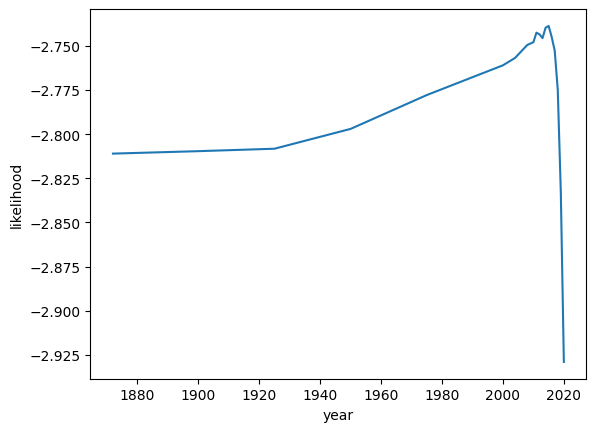

In [47]:
years = [
    1872, 1900, 1925, 1950, 1975, 2000,
    2004, 2008, 2010, 2011, 2012, 2013,
    2014, 2015, 2016, 2017, 2018, 2019,
    2020
]
train_until = 2020
test_from = 2021
test_until = 2022

likelihoods = []

for y in years:
    print("=======")
    print(y)
    print("=======")
    model = fit_model_between(y, train_until)
    likelihoods.append(test_model_between(model, test_from, test_until))


Text(0, 0.5, 'log likelihood (2021 - 2022)')

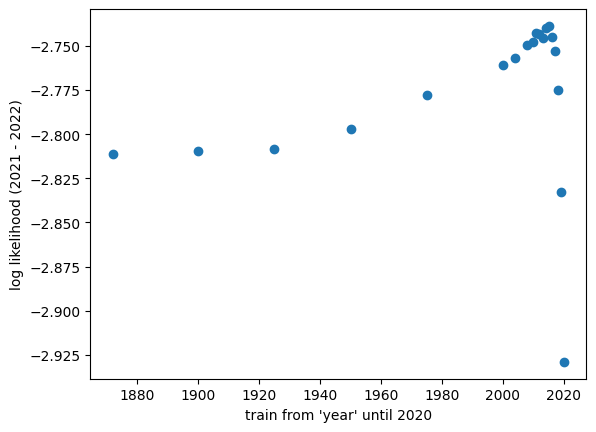

In [58]:
plt.plot(years, likelihoods, "o")
plt.xlabel(f"train from 'year' until {train_until}")
plt.ylabel(f"log likelihood ({test_from} - {test_until})")

In [50]:
pd.Series(likelihoods, index=years)

1872   -2.810997
1900   -2.809613
1925   -2.808227
1950   -2.796989
1975   -2.777815
2000   -2.760951
2004   -2.756748
2008   -2.749413
2010   -2.747872
2011   -2.742429
2012   -2.743396
2013   -2.745532
2014   -2.739667
2015   -2.738628
2016   -2.744843
2017   -2.752637
2018   -2.774900
2019   -2.832764
2020   -2.929056
dtype: float64

Max likelihood at 2015, i.e. when training with 6 full years of data.

So for World Cup 2022 may want to include 2016-2022 results.